# Time Series Data Generation - Use Case A

- historical occupancy for 10 years 2013 to 2023
- TBD


In [1]:
# Libraries and generation functions
# Amended from assignment provided code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to generate time series
def generate_time_series(n_periods=100, frequency='days', trend_slope=0.3, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.5):
    # Set frequency based on the input (days, months, or weeks)
    start_date = '2013-01-01'
    if frequency == 'days':
        freq = 'D'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    elif frequency == 'months':
        freq = 'M'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    elif frequency == 'weeks':
        freq = 'W'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    else:
        raise ValueError("Frequency should be 'days', 'months', or 'weeks'.")

    # 1. Create a linear trend: A simple increasing trend from 0 to trend_slope * n_periods
    trend = np.linspace(0, trend_slope * n_periods, n_periods)  # Linear trend

    # 2. Add seasonality based on the chosen period (weekly, monthly, or annual)
    seasonal_component = np.zeros(n_periods)
    if seasonal_period == 'monthly':
        # One full cycle per year (12 months)
        seasonal_frequency = 2 * np.pi / 12  # For monthly frequency
    elif seasonal_period == 'weekly':
        # One full cycle per year (52 weeks)
        seasonal_frequency = 2 * np.pi / 52  # For weekly frequency
    elif seasonal_period == 'annual':
        # One full cycle per year (365 days)
        seasonal_frequency = 2 * np.pi / 365  # For annual frequency
    else:
        raise ValueError("Seasonal period should be 'monthly', 'weekly', or 'annual'.")

    # Smooth seasonal component (sine wave with the defined frequency)
    seasonal_component = seasonal_amplitude * np.sin(np.linspace(0, seasonal_frequency * n_periods, n_periods))

    # 3. Add minimal noise to the time series to make the residuals more realistic
    noise = np.random.normal(0, noise_level, n_periods)

    # 4. Combine the trend and seasonality
    time_series = trend + seasonal_component + noise

    # Prepare data for CSV output
    data = {'Time': time_index[:len(time_series)], 'Value': time_series}
    df = pd.DataFrame(data)

    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Value'], label='Generated Time Series')
    plt.title('Generated Time Series Data with Trend and Seasonality')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    #df.to_csv('generated_time_series.csv', index=False)
    #print("Time series data saved to 'generated_time_series.csv'.")

    return df

#
def decompose_time_series(df, frequency='D'):
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Set 'Time' as the index
    df.set_index('Time', inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(df['Value'], model='additive', period=365 if frequency == 'days' else 12)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()


,Hotel,Country,Hemisphere,Climate,Ranking
0,The Place,UK,North,Temperate,3
1,Le Meridien,France,North,Warm,4
2,The Chedi,Oman,North,Hot,5
3,Royal Malewane,South Africa,South,Hot,5
4,Enter Tromso,Norway,North,Cold,1
5,Tuckerbox Inn,Australia,South,Warm,2


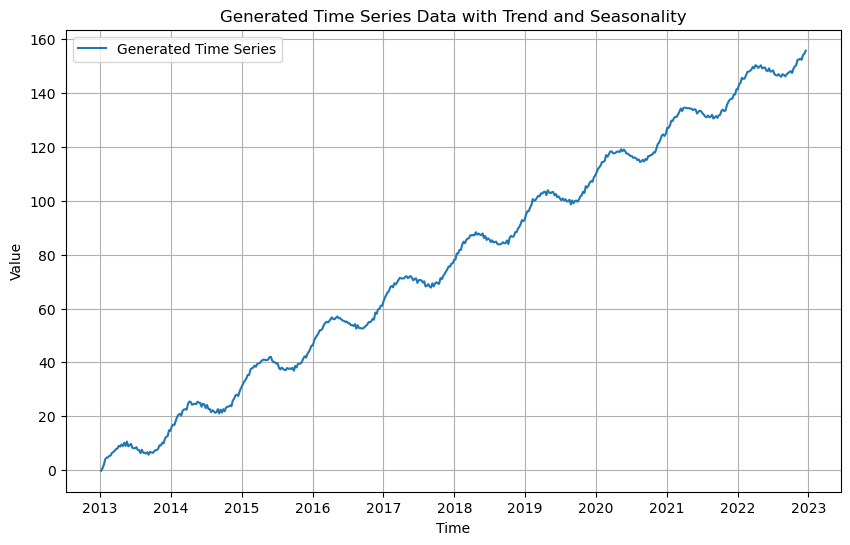

Time series data saved to 'generated_time_series.csv'.


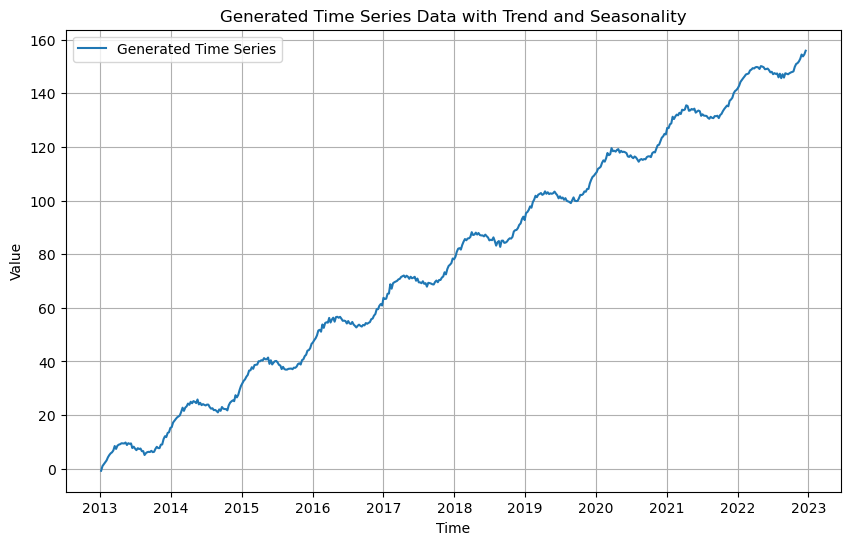

Time series data saved to 'generated_time_series.csv'.


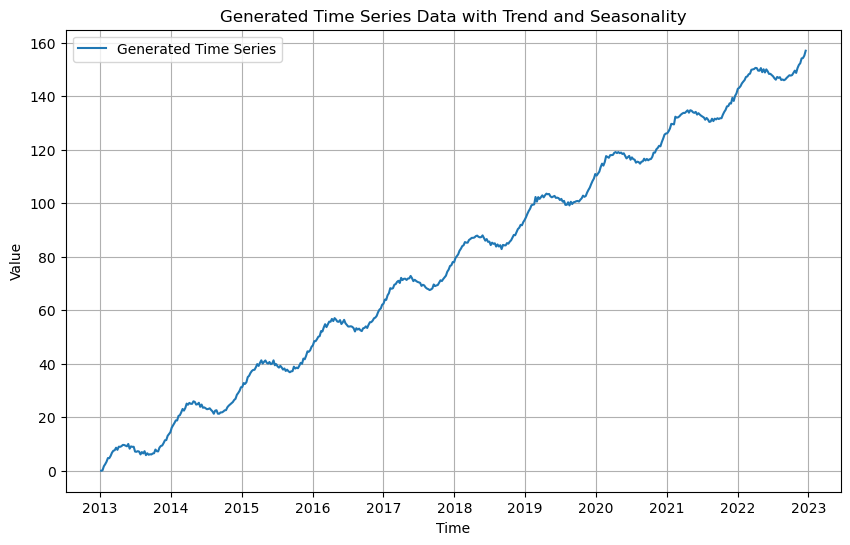

Time series data saved to 'generated_time_series.csv'.


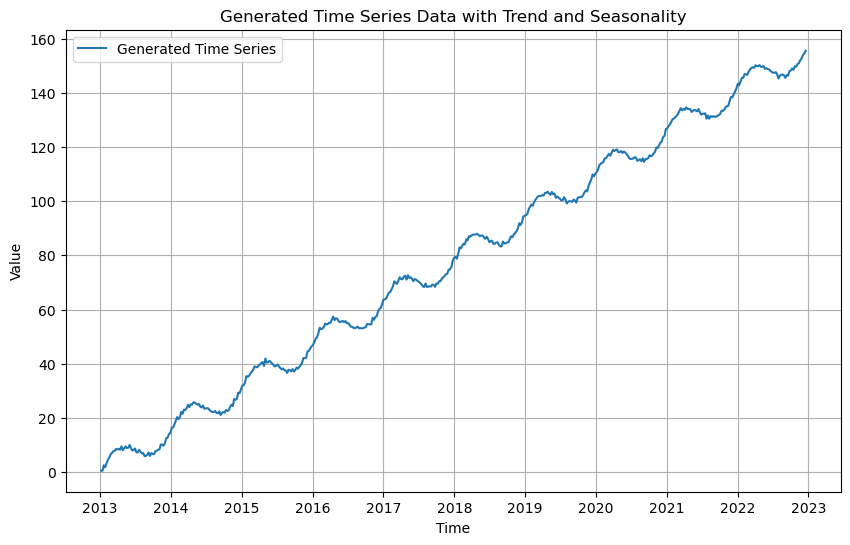

Time series data saved to 'generated_time_series.csv'.


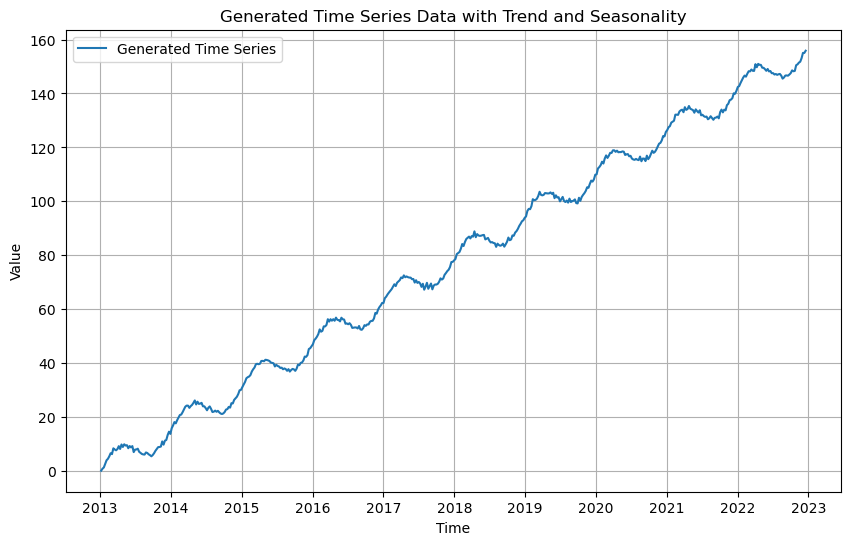

Time series data saved to 'generated_time_series.csv'.


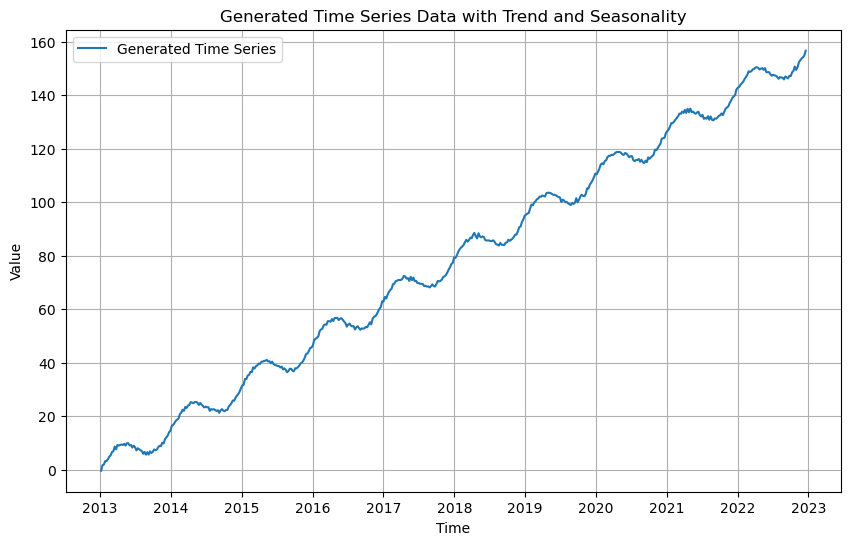

Time series data saved to 'generated_time_series.csv'.


<bound method NDFrame.head of     Week_Commencing   The Place  Le Meridien   The Chedi  Royal Malewane  \
0        2013-01-06   -0.248527    -0.759770    0.074946        0.509799   
1        2013-01-13    0.650544     0.968983    0.189607        0.521034   
2        2013-01-20    1.954066     1.666898    1.734319        2.496847   
3        2013-01-27    3.940115     2.417851    2.518469        1.796775   
4        2013-02-03    4.616576     3.073494    3.456967        3.275863   
..              ...         ...          ...         ...             ...   
515      2022-11-20  152.804072   152.859341  152.297163      152.016387   
516      2022-11-27  152.376128   154.459733  154.104805      152.750247   
517      2022-12-04  154.105617   153.774412  154.232281      153.851539   
518      2022-12-11  154.592364   154.493826  155.139794      154.563292   
519      2022-12-18  155.750077   155.882529  156.978582      155.532003   

     Enter Tromso  Tuckerbox Inn  
0        0.154584     

In [9]:
# Generate Occupancy Data

# 10 years of weekly occupancy data for several different hotels, resorts in different locations
# Locations have different weather patterns/seasons and local events, holiday seasons

# Establish resorts with name, location, climate, price ranking
hotels_dict = { 
        'Hotel': ['The Place', 'Le Meridien', 'The Chedi', 'Royal Malewane', 'Enter Tromso', 'Tuckerbox Inn'],
        'Country': ['UK', 'France', 'Oman', 'South Africa', 'Norway', 'Australia'],
        'Hemisphere': ['North', 'North', 'North', 'South', 'North', 'South'],
        'Climate': ['Temperate', 'Warm', 'Hot', 'Hot', 'Cold', 'Warm'],
        'Ranking': [3,4,5,5,1,2]
        }
hotels_df = pd.DataFrame(hotels_dict)
display(hotels_df)

# Generate an occupancy history time series for each hotel
gen_periods = 520
gen_frequency = 'weeks'
gen_seasonal_period = 'weekly'

hotel_occupancy_history_df = pd.DataFrame()

for row in hotels_df.itertuples():
    # Generate a different time series for each hotel

    time_series_df = generate_time_series(n_periods=gen_periods, frequency=gen_frequency, trend_slope=0.3, seasonal_period=gen_seasonal_period, seasonal_amplitude=5, noise_level=0.5)
    
    # Add a column of time series for each hotel
    time_series_df.rename(columns={'Time': 'Week_Commencing', 'Value': row.Hotel}, inplace=True)
    if hotel_occupancy_history_df.empty:
        hotel_occupancy_history_df = time_series_df
    else:
        hotel_occupancy_history_df[row.Hotel] = time_series_df[row.Hotel]


display(hotel_occupancy_history_df.head)










# TO-DO: rescale occupancy to non-zero start and make assumptions on number of hotels/ resorts and their size
# ?? Occupancy per resort?

#decompose_time_series(df)